In [1]:
# import osmnx as ox
import pandas as pd
import geopandas as gpd
import json
from io import StringIO
import warnings
import sys
import os
warnings.filterwarnings("ignore")
sys.stderr = open(os.devnull, 'w')

# local crs
local_crs = 32636

In [2]:
from popframe.models.region import Region

region_model = Region.from_pickle('data/Ленинградская область.pickle')

In [3]:
grid = gpd.read_file('data/grid.geojson', engine="pyogrio")

In [5]:
from popframe.method.territory_evaluation import TerritoryEvaluation
from popframe.models.region import Region
from shapely.geometry import shape

evaluation = TerritoryEvaluation(region=region_model)

geojson_data = {
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [
                [29.982879431084967, 59.363554752593245],
                [29.982879431084967, 59.322083801173534],
                [30.109075699649765, 59.322083801173534],
                [30.109075699649765, 59.363554752593245],
                [29.982879431084967, 59.363554752593245]
            ]
        ]
    },
    "properties": {},
    "type": "Feature"
}

geom = shape(geojson_data['geometry'])

# Создаем GeoDataFrame
territories_gdf = gpd.GeoDataFrame([{'geometry': geom}], crs='EPSG:4326')

result = evaluation.evaluate_territory_location(territories=grid)
scores_df = pd.DataFrame(result)
scores_df

,territory,score,interpretation,closest_settlement,closest_settlement1,closest_settlement2
0,None,3,Территория находится внутри или непосредственн...,Ромашки,None,None
1,None,1,Территория находится внутри или непосредственн...,Казённое Село,None,None
2,None,6,Территория находится внутри или непосредственн...,Всеволожск,None,None
3,None,1,Территория находится внутри или непосредственн...,Пидьма,None,None
4,None,1,Территория находится внутри или непосредственн...,Рязанский Шлюз,None,None
...,...,...,...,...,...,...
2143,None,3,Территория находится внутри или непосредственн...,Гаврилово,None,None
2144,None,1,Территория находится внутри или непосредственн...,Зеленец (поселок),None,None
2145,None,1,Территория находится внутри или непосредственн...,Бестоголово,None,None
2146,None,5,Территория находится внутри или непосредственн...,Лемболово (поселок при ж/д),None,None


In [9]:
grid['score'] = scores_df['score']
grid

,geometry,score
0,"POLYGON ((29.65352 60.75606, 29.69198 60.73276...",3
1,"POLYGON ((34.21298 59.70612, 34.24864 59.68080...",1
2,"POLYGON ((30.54114 59.98839, 30.57846 59.96455...",6
3,"POLYGON ((34.68571 60.95192, 34.72244 60.92676...",1
4,"POLYGON ((34.50920 59.59026, 34.54462 59.56480...",1
...,...,...
2143,"POLYGON ((28.90861 60.56897, 28.94710 60.54592...",3
2144,"POLYGON ((32.84355 59.76933, 32.87981 59.74454...",1
2145,"POLYGON ((32.53064 59.24881, 32.56650 59.22401...",1
2146,"POLYGON ((30.05365 60.38205, 30.09156 60.35850...",5


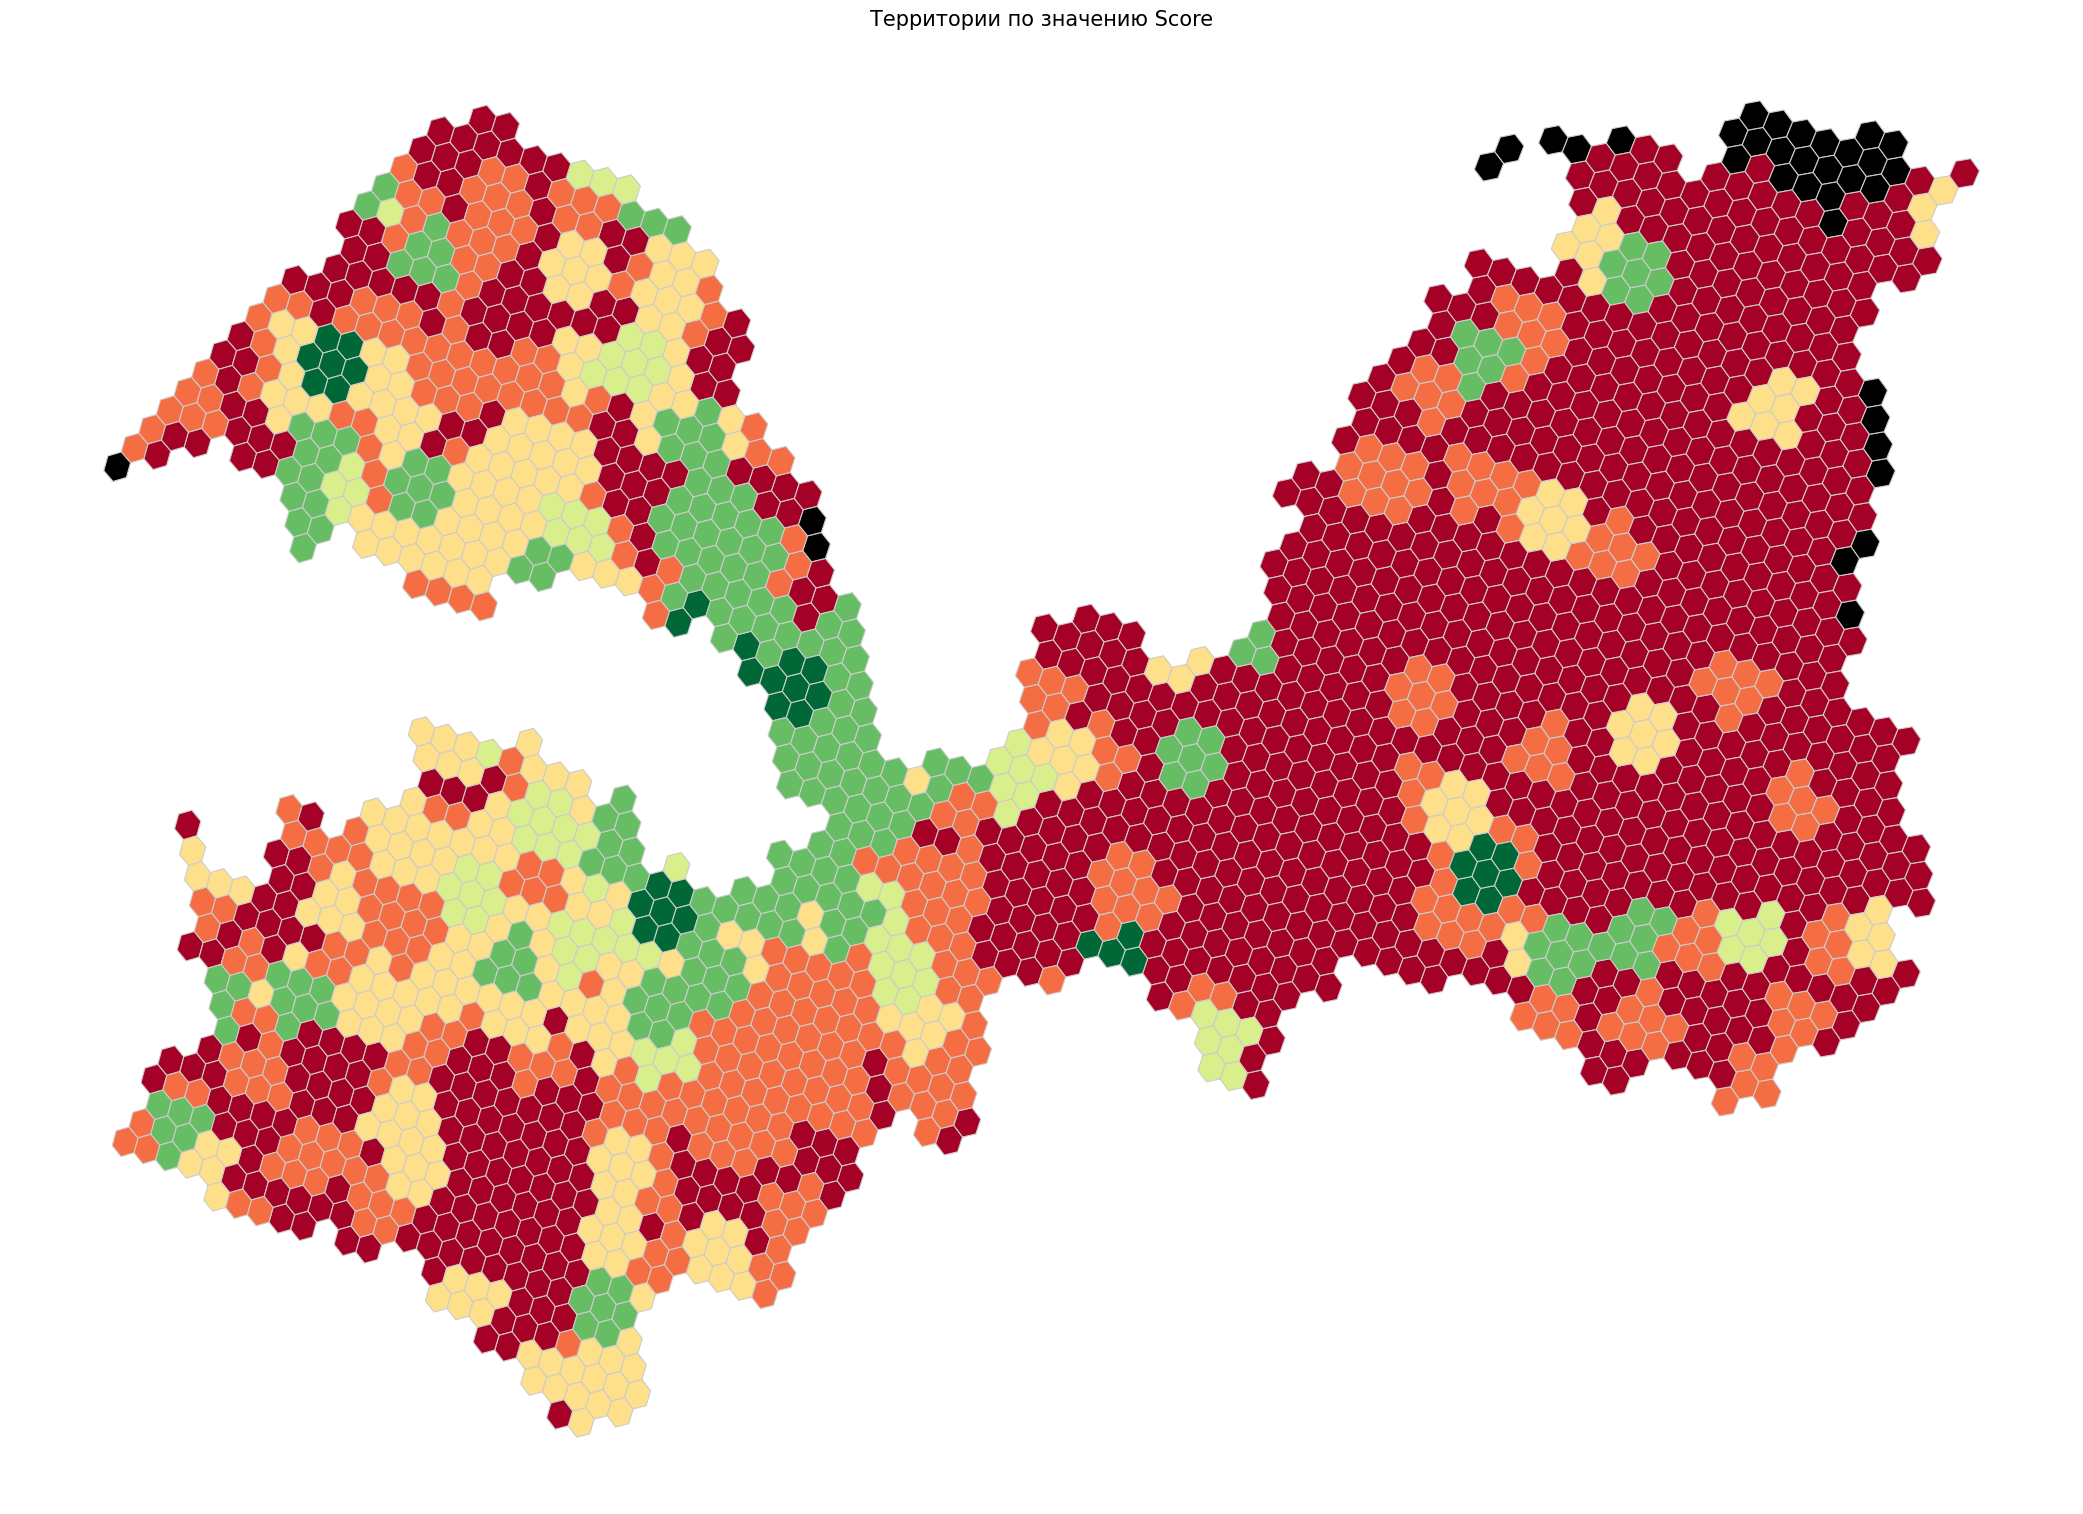

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np

# Предположим, что у вас есть GeoDataFrame с колонкой 'score'
# gdf содержит геометрию и колонку с оценками ('score')

# Определяем цветовую карту: от красного (низкий score) к зелёному (высокий score)
cmap = cm.get_cmap('RdYlGn')

# Определяем нормализацию значений для цветовой карты, начиная с 1
norm = colors.Normalize(vmin=1, vmax=grid['score'].max())

# Создаём карту
fig, ax = plt.subplots(1, 1, figsize=(30, 15))  # Увеличиваем размер карты

# Функция для задания цвета
def get_color(score):
    if score == 0:
        return 'black'  # Окрашиваем в черный если score равен 0
    else:
        return cmap(norm(score))  # Используем цветовую карту для оценок от 1 и выше

# Применяем цвета к каждой области
grid['color'] = grid['score'].apply(get_color)

# Визуализируем с раскраской по значению 'color'
grid.plot(color=grid['color'], linewidth=0.8, ax=ax, edgecolor='0.8')

# Отключаем оси
ax.set_axis_off()

# Настраиваем автоматическое управление компоновкой
plt.tight_layout()

# Добавляем заголовок
ax.set_title('Территории по значению Score', fontsize=15)

# Показать карту
plt.show()